In [1]:
from LorisBallsBasedModel import *
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

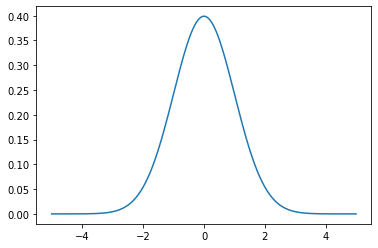

In [2]:
mean = 0; std = 1; variance = np.square(std)
x = np.arange(-5,5,.01)
y = np.exp(-np.square(x-mean)/2*variance)/(np.sqrt(2*np.pi*variance))

plt.plot(x, y)
plt.show()

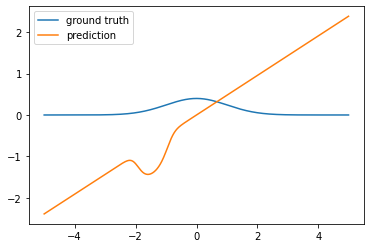

In [3]:
# Note: The goal is to highlight a paraboloid subspace => 'add_linear' to true don't only highlight a paraboloid subspace ...

# model = MultiLayerPerceptron([BoundedParaboloids(10, add_linear=True), BoundedParaboloids(1, add_linear=True)])
model = SingleLayerPerceptron(BoundedParaboloids(1,
                                                 add_linear=True))
model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['acc'])
y_hat = model.predict(x.reshape(-1, 1)).flatten()

plt.plot(x, y, label="ground truth")
plt.plot(x, y_hat, label="prediction")
plt.legend()
plt.show()

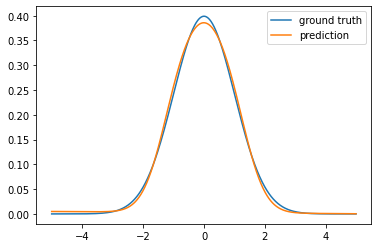

In [4]:
history = model.fit(x.reshape(-1, 1),
                    y.reshape(-1, 1),
                    epochs=200,
                    verbose=0)

y_hat = model.predict(x.reshape(-1, 1)).flatten()

plt.plot(x, y, label="ground truth")
plt.plot(x, y_hat, label="prediction")
plt.legend()
plt.show()

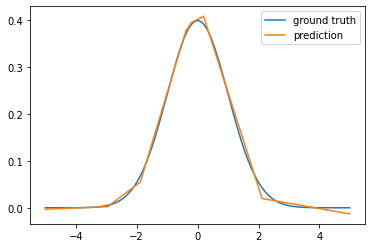

In [5]:
model = MultiLayerPerceptron([tf.keras.layers.Dense(10, 'relu'),
                              tf.keras.layers.Dense(1)])
model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['acc'])
model.fit(x.reshape(-1, 1),
          y.reshape(-1, 1),
          epochs=200,
          verbose=0)

y_hat = model.predict(x.reshape(-1, 1)).flatten()

plt.plot(x, y, label="ground truth")
plt.plot(x, y_hat, label="prediction")
plt.legend()
plt.show()